## Import Library

In [76]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Baca dataset
data_df = pd.read_csv("E:\KULIAH\Semester 6\ML2\mmm.csv")
data_df.head()

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin
0,1,Mitsubishi,1870,290000000,Manual,27499,Petrol/Gasoline/Bensin,1800000,28,1.8
1,2,Honda civic type R,2022,400000000,Manual,20000,Diesel/Solar,150000,25,1.2
2,3,Toyota Innova V,2017,370000000,Manual,5000000,Petrol/Gasoline/Bensin,2000000,28,1.8
3,4,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20,1.0
4,5,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22,1.2


## Preprocessing

In [78]:
# informasi umum kolom pada dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no            160 non-null    int64  
 1   model         160 non-null    object 
 2   tahun         160 non-null    int64  
 3   harga         160 non-null    int64  
 4   transmisi     160 non-null    object 
 5   jarak_tempuh  160 non-null    int64  
 6   bahan_bakar   160 non-null    object 
 7   pajak         160 non-null    int64  
 8   mpg           160 non-null    int64  
 9   ukuran_mesin  160 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 12.6+ KB


In [79]:
#Checking Duplicates
data_duplicates_rows=data_df[data_df.duplicated()]
data_duplicates_rows

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


In [80]:
#Removing Duplicates in any
data_df=data_df.drop_duplicates()
data_df

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin
0,1,Mitsubishi,1870,290000000,Manual,27499,Petrol/Gasoline/Bensin,1800000,28,1.8
1,2,Honda civic type R,2022,400000000,Manual,20000,Diesel/Solar,150000,25,1.2
2,3,Toyota Innova V,2017,370000000,Manual,5000000,Petrol/Gasoline/Bensin,2000000,28,1.8
3,4,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20,1.0
4,5,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22,1.2
...,...,...,...,...,...,...,...,...,...,...
155,156,Mitsubishi L300,2022,224000000,Manual,21000,Diesel/Solar,3200000,22,1.5
156,157,Daihatsu Grand Max Delvan,2018,148000000,Manual,20219,Petrol/Gasoline/Bensin,2000000,25,1.3
157,158,Isuzu Kijang Phanter,2016,287000000,Manual,8912,Diesel/Solar,3200000,30,2.0
158,159,Toyota Avanza,2011,295000000,Automatic,28335,Petrol/Gasoline/Bensin,2000000,23,1.3


In [82]:
# informasi umum kolom pada dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no            160 non-null    int64  
 1   model         160 non-null    object 
 2   tahun         160 non-null    int64  
 3   harga         160 non-null    int64  
 4   transmisi     160 non-null    object 
 5   jarak_tempuh  160 non-null    int64  
 6   bahan_bakar   160 non-null    object 
 7   pajak         160 non-null    int64  
 8   mpg           160 non-null    int64  
 9   ukuran_mesin  160 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 13.8+ KB


In [83]:
# Menghapus kolom 'model', 'transmisi', 'bahan_bakar', dan 'ukuran_mesin'
data_df.drop(['model', 'transmisi', 'bahan_bakar', 'ukuran_mesin'], axis=1, inplace=True)

# Menampilkan DataFrame setelah penghapusan kolom
print(data_df.head())


   no  tahun      harga  jarak_tempuh    pajak  mpg
0   1   1870  290000000         27499  1800000   28
1   2   2022  400000000         20000   150000   25
2   3   2017  370000000       5000000  2000000   28
3   4   2020  136000000         24089  1725250   20
4   5   2017  200000000         19400  1200000   22


In [84]:
# informasi statistik dari dataset
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no,160.0,8.050000e+01,4.633213e+01,1.0,4.075000e+01,80.5,1.202500e+02,1.600000e+02
tahun,160.0,2.014450e+03,1.212036e+01,1870.0,2.013000e+03,2016.0,2.018000e+03,2.023000e+03
harga,160.0,1.686450e+08,1.811359e+08,147.0,1.072500e+08,132000000.0,1.863500e+08,2.147484e+09
jarak_tempuh,160.0,1.195561e+05,3.964340e+05,1020.0,3.038400e+04,70290.0,1.120000e+05,5.000000e+06
pajak,160.0,2.610075e+06,1.288941e+06,145000.0,2.000000e+06,2475000.0,3.200000e+06,9.431000e+06
mpg,160.0,2.527500e+01,4.164767e+00,20.0,2.200000e+01,25.0,2.500000e+01,4.200000e+01


In [85]:
# cek apakah ada missing value pada dataset
data_df.isnull().sum()

no              0
tahun           0
harga           0
jarak_tempuh    0
pajak           0
mpg             0
dtype: int64

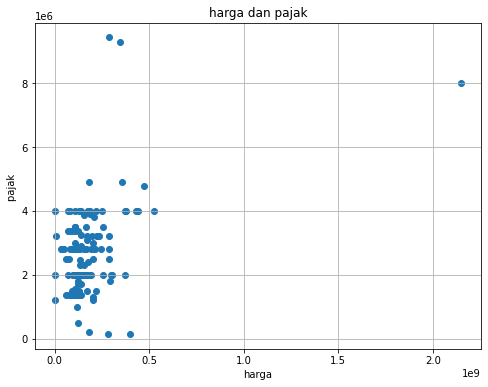

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(data_df['harga'], data_df['pajak'])
plt.xlabel('harga')
plt.ylabel('pajak ')
plt.title('harga dan pajak')
plt.grid(True)
plt.show()

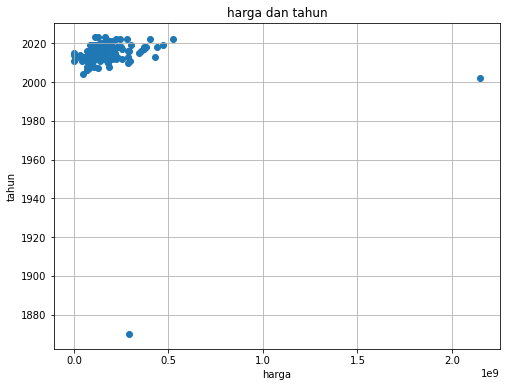

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(data_df['harga'], data_df['tahun'])
plt.xlabel('harga')
plt.ylabel('tahun')
plt.title('harga dan tahun')
plt.grid(True)
plt.show()

### Split Dataset

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Inisialisasi Scaler
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = data_df.drop('harga', axis=1)
y = data_df['harga']

# Tentukan kolom yang merupakan variabel kategori
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Pipeline untuk transformasi data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ~X[categorical_cols].columns),  # Scaling untuk variabel numerik
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encoding untuk variabel kategori
    ])

# Skala data variabel independen
X_scaled = preprocessor.fit_transform(X)

# Pembagian dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn import metrics

# Fungsi untuk menampilkan hasil evaluasi model
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)


## Membangun model

In [94]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR





# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur (opsional tetapi disarankan untuk SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menginisialisasi model SVR dengan kernel polinomial
svr_poly = SVR(kernel='poly', C=10, gamma='auto', degree=3, epsilon=0.2)

# Melatih model SVR
svr_poly.fit(X_train_scaled, y_train)

# Memprediksi menggunakan model yang dilatih
y_pred = svr_poly.predict(X_test_scaled)

# Evaluasi model
print_evaluate(y_test, y_pred)


MAE: 53844366.52536438
MSE: 6339209985902919.0
RMSE: 79619155.89795536
R2 Square -0.058366705769942406


## Visualisasi

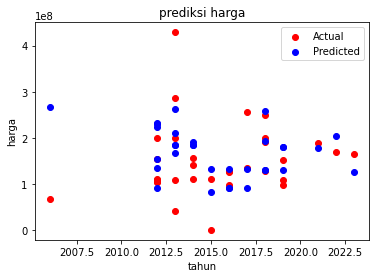

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Membaca data dari file CSV
data = pd.read_csv('E:\KULIAH\Semester 6\ML2\mmm.csv')


X = data[['tahun', 'pajak']]  
y = data['harga']  

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Scatter plot dari data uji dan data yang diprediksi
plt.scatter(X_test['tahun'], y_test, color='red', label='Actual')
plt.scatter(X_test['tahun'], y_pred, color='blue', label='Predicted')
plt.title('prediksi harga')
plt.xlabel('tahun')
plt.ylabel('harga')
plt.legend()
plt.show()


Persamaan Polinomial:
          3             2
1.76e+04 x - 1.055e+08 x + 2.106e+11 x - 1.402e+14


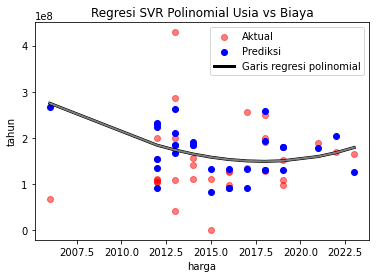

In [98]:
# Sort the test data and predicted data
sorted_indices = np.argsort(X_test.iloc[:,0], axis=0) 
X_test_sorted = X_test.iloc[:,0].values[sorted_indices].reshape(-1,1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Persamaan Polinomial:")
print(polynomial)

# Plot titik data
plt.scatter(X_test.iloc[:,0], y_test, alpha=0.5, color='red', label='Aktual')
plt.scatter(X_test.iloc[:,0], y_pred, color='blue', label='Prediksi')

# Plot kurva polinomial
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Garis regresi polinomial', linewidth=3)
plt.plot(X_test_sorted, polynomial(X_test_sorted)-5, color='gray', )
plt.plot(X_test_sorted, polynomial(X_test_sorted)+5, color='gray')

# Menambah judul dan label
plt.title('harga dan tahun')
plt.xlabel('harga')
plt.ylabel('tahun')

# Menambah legenda
plt.legend()

# Menampilkan plot
plt.show()